<a href="https://colab.research.google.com/github/tofighi/Public/blob/master/concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/data.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/01.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/02.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/03.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/04.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/05.csv')

df

,concentration,instrumant readings
0,0,1.0
1,1,3.0
2,2,5.0
3,3,7.0
4,4,9.0
5,5,11.0
6,6,12.3
7,7,13.8
8,8,15.1
9,10,18.0


In [3]:
df2 = df[['concentration','instrumant readings']]
df2

,concentration,instrumant readings
0,0,1.0
1,1,3.0
2,2,5.0
3,3,7.0
4,4,9.0
5,5,11.0
6,6,12.3
7,7,13.8
8,8,15.1
9,10,18.0


In [0]:
def p(x):
    return 6*x**5 - 2*x**4 +3 * x**2 + 2 * x + 1

In [0]:
np.random.seed(145837)


In [0]:
N = 12
var = 10**-1

left = -1
right = 3

xs = stats.uniform.rvs(left, right, size=N)
eps = stats.norm.rvs(0, np.sqrt(var), size=N)
ys = p(xs) + eps


In [7]:
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9    10
Name: concentration, dtype: int64
0     1.0
1     3.0
2     5.0
3     7.0
4     9.0
5    11.0
6    12.3
7    13.8
8    15.1
9    18.0
Name: instrumant readings, dtype: float64


In [8]:
scaler = StandardScaler()
scaler.fit(df2)
df2_norm=scaler.transform(df2)
df2_norm

array([[-1.5132889 , -1.62934011],
       [-1.18431305, -1.24686591],
       [-0.8553372 , -0.8643917 ],
       [-0.52636136, -0.4819175 ],
       [-0.19738551, -0.09944329],
       [ 0.13159034,  0.28303091],
       [ 0.46056619,  0.53163914],
       [ 0.78954203,  0.8184948 ],
       [ 1.11851788,  1.06710303],
       [ 1.77646958,  1.62169063]])

In [0]:
ys = df2_norm[:,[0]].ravel()
#print(xs)
xs = df2_norm[:,[1]].ravel()
#print(ys)

In [10]:
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9    10
Name: concentration, dtype: int64
0     1.0
1     3.0
2     5.0
3     7.0
4     9.0
5    11.0
6    12.3
7    13.8
8    15.1
9    18.0
Name: instrumant readings, dtype: float64


In [0]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [12]:
known_degree_model = PolynomialRegression(deg=3)
known_degree_model.fit(xs, ys)
known_degree_model.coef_

array([ 6.39882993e-04, -6.05237899e-02,  2.24407423e+00,  8.90264637e-01])

In [0]:
overfit_model = PolynomialRegression(deg=N - 1)
overfit_model.fit(xs, ys)

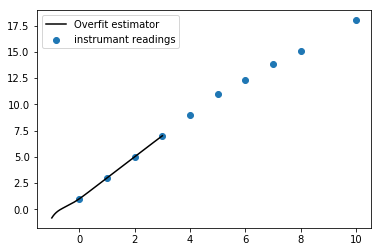

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot_xs = np.linspace(left, right, (right - left) * 100)

ax.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [15]:
mean_squared_error(overfit_model.predict(xs), ys)


6.26424195183374e-12

In [16]:
N_prediction = 10

prediction_xs = stats.uniform.rvs(left, right, size=N_prediction)
prediction_eps = stats.norm.rvs(0, np.sqrt(var), size=N_prediction)
prediction_ys = p(prediction_xs) + prediction_eps

mean_squared_error(overfit_model.predict(prediction_xs), prediction_ys)

7.488003482088215

In [17]:
estimator = PolynomialRegression()
degrees = np.arange(1, 25)
cv_model = GridSearchCV(estimator,
                        cv=3,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
cv_model.fit(xs, ys);


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
cv_model.best_params_, cv_model.best_estimator_.coef_

({'deg': 2}, array([-0.0508809 ,  2.20725863,  0.91338971]))

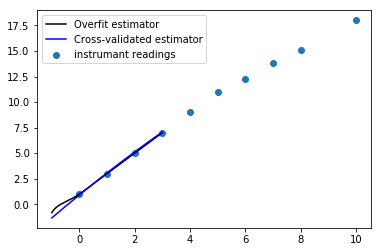

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
plt.plot(plot_xs, cv_model.predict(plot_xs), color='b', label='Cross-validated estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [20]:
mean_squared_error(cv_model.predict(xs), ys)


0.020521494009866074

In [21]:
mean_squared_error(cv_model.predict(prediction_xs), prediction_ys)


7.3368295618241275

Text(0.5, 0, 'Polynomial Degree')

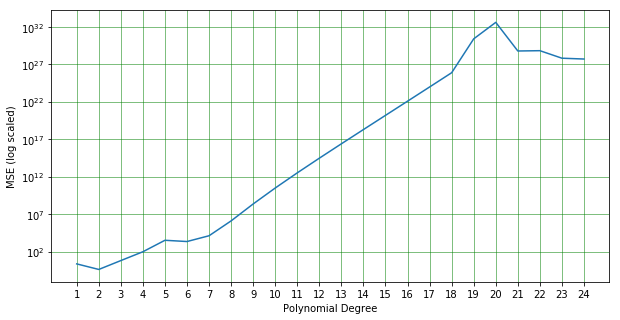

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

cv_model.cv_results_

#scores = np.array([mean_test_score in cv_model.cv_results_])
scores= cv_model.cv_results_['mean_test_score']

ax.plot(degrees, -scores)
plt.xticks(np.arange(1, np.max(degrees)+1, step=1))
plt.grid(color='g', linestyle='-', linewidth=.5)
ax.set_yscale('log')
ax.set_ylabel('MSE (log scaled)')
ax.set_xlabel('Polynomial Degree')